# Cell 0 — setup project root for imports

In [1]:

import sys, os

# go one level up from notebooks/ to project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added to sys.path:", project_root)


Project root added to sys.path: /Users/sajandeepsingh/Desktop/olist project


Cell 1 — imports & engine

In [2]:
import pandas as pd
from config.db import get_engine
import matplotlib.pyplot as plt
import seaborn as sns

engine = get_engine()

Cell 2 — quick samples


In [3]:
orders = pd.read_sql('SELECT * FROM olist_orders_dataset LIMIT 10;', engine)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Cell 3 — distribution of order_status

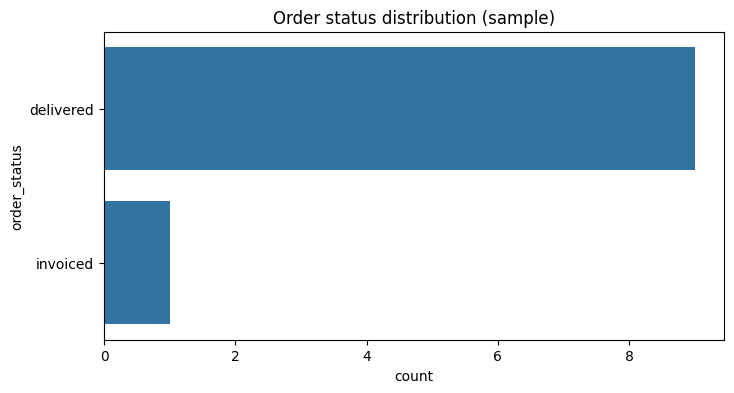

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(y='order_status', data=orders, order=orders['order_status'].value_counts().index)
plt.title('Order status distribution (sample)')
plt.show()

Cell 4 — payments summary

In [5]:
payments = pd.read_sql('SELECT * FROM olist_order_payments_dataset LIMIT 20000;', engine)
payments['payment_value'].describe()

count    20000.000000
mean       153.718410
std        207.188488
min          0.000000
25%         57.167500
50%        100.000000
75%        173.332500
max       4764.340000
Name: payment_value, dtype: float64